<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 8.7 MB/s 


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 108 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [150]:
import pyupbit

In [175]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-axs", interval="minute15")
df

,open,high,low,close,volume,value
2022-12-03 21:45:00,9325.0,9345.0,9315.0,9320.0,2789.751774,2.601891e+07
2022-12-03 22:00:00,9340.0,9340.0,9315.0,9335.0,3140.008504,2.927010e+07
2022-12-03 22:15:00,9330.0,9330.0,9320.0,9325.0,946.880107,8.830741e+06
2022-12-03 22:30:00,9320.0,9330.0,9310.0,9330.0,3201.286934,2.983126e+07
2022-12-03 22:45:00,9325.0,9340.0,9315.0,9330.0,2729.366455,2.546541e+07
...,...,...,...,...,...,...
2022-12-05 22:30:00,11400.0,11490.0,11200.0,11220.0,729144.528221,8.269372e+09
2022-12-05 22:45:00,11220.0,11230.0,11030.0,11110.0,528901.546126,5.891097e+09
2022-12-05 23:00:00,11100.0,11210.0,11040.0,11150.0,282686.800064,3.145218e+09
2022-12-05 23:15:00,11140.0,11140.0,10940.0,10980.0,253468.477238,2.793617e+09


In [176]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-12-03 21:45:00,9320.0
1,2022-12-03 22:00:00,9335.0
2,2022-12-03 22:15:00,9325.0
3,2022-12-03 22:30:00,9330.0
4,2022-12-03 22:45:00,9330.0
...,...,...
195,2022-12-05 22:30:00,11220.0
196,2022-12-05 22:45:00,11110.0
197,2022-12-05 23:00:00,11150.0
198,2022-12-05 23:15:00,10980.0


In [177]:
#prophet 불러옴
from fbprophet import Prophet

In [178]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [179]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

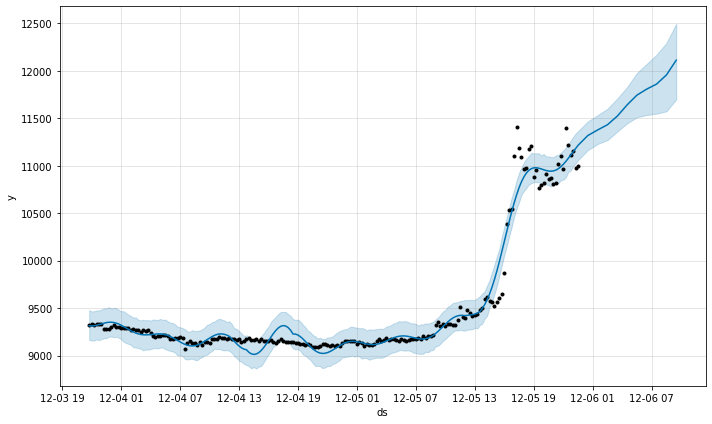

In [180]:
#그래프1
fig1 = model.plot(forecast)

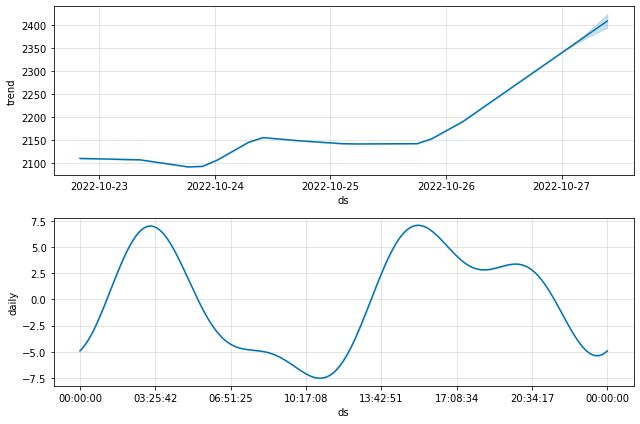

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)